In [1]:
from datetime import datetime
from astropy.coordinates import SkyCoord
from astropy.table import Table, QTable
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import warnings
warnings.filterwarnings("ignore")

In [2]:
time_ini = datetime.now()

In [3]:
#images directory:
main_dir=f'observations/'

#directory for saving results:
res_dir=f'results/data_sample/'

# Data sample:

We use data from two filters: F200W and F444W. F200W is the best filter in terms of PSF and resolution and thus wields the best results. F444W contains the largest wavelengths; because bars are dominated by older population stars, they are most visible at redder wavelengths.

In [4]:
#loading JADES data:
data_jades=main_dir+f'hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits'

#opening extensions 9 (redshifts), 2 (coordinates), 3 (half-light radius or effective radius)
#and 5 (flux in nJy):
with fits.open(data_jades) as hdul:
    header_z=hdul[9].header
    data_z=hdul[9].data
    header_coord=hdul[2].header
    data_coord=hdul[2].data
    header_re=hdul[3].header
    data_re=hdul[3].data
    header_mag=hdul[5].header
    data_mag=hdul[5].data

In [5]:
num=[]
z=[]
z_u=[]
z_l=[]
ra=[]
dec=[]
flux_F200W=[]
flux_F444W=[]
flux_F200W_e=[]
flux_F444W_e=[]
re_F200W=[]
re_F444W=[]

#selecting galaxies with a redshift>1:
for i in range(len(data_z)):
    if data_z['EAZY_z_a'][i]>1:
        num.append(data_z['ID'][i])
        z.append(data_z['EAZY_z_a'][i])
        z_u.append(data_z['EAZY_u68'][i])
        z_l.append(data_z['EAZY_l68'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])
        flux_F200W.append(data_mag['F200W_CIRC0'][i])
        flux_F444W.append(data_mag['F444W_CIRC0'][i])
        flux_F200W_e.append(data_mag['F200W_CIRC0_ei'][i])
        flux_F444W_e.append(data_mag['F444W_CIRC0_ei'][i])
        re_F200W.append(data_re['F200W_RHALF'][i])
        re_F444W.append(data_re['F444W_RHALF'][i])

#creating a new table with the relevant information:        
table=Table()
table['ID']=num
table['RA']=ra
table['DEC']=dec
table['z']=z
table['z_upper']=z_u
table['z_lower']=z_l
table['Flux_F200W']=flux_F200W
table['Flux_F444W']=flux_F444W
table['Flux_F200W_error']=flux_F200W_e
table['Flux_F444W_error']=flux_F444W_e
table['Re_F200W']=re_F200W
table['Re_F444W']=re_F444W

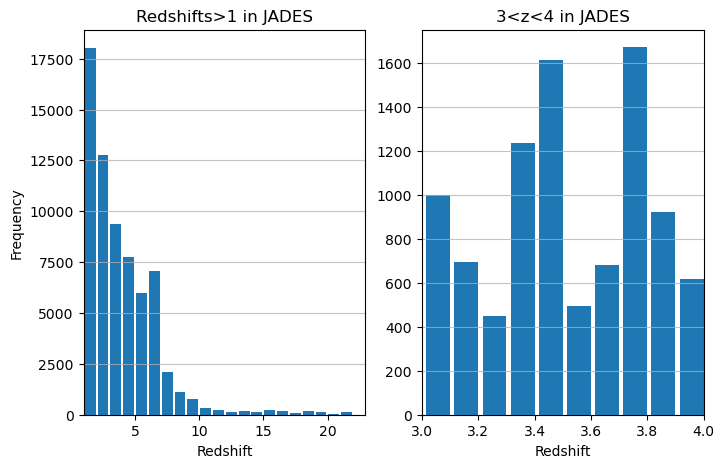

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

#histogram on all the data:
plot=ax1.hist(x=table['z'], bins=round(max(table['z']))-1, rwidth=0.85)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Frequency')
ax1.set_title('Redshifts>1 in JADES')
ax1.set_xlim(xmin=1)

#histogram on sample 3<z<4:
plot2=ax2.hist(x=table['z'], bins=10*(round(max(table['z']))-1), rwidth=0.85)
ax2.grid(axis='y', alpha=0.75)
ax2.set_xlabel('Redshift')
ax2.set_title('3<z<4 in JADES')
ax2.set_xlim(xmin=3,xmax=4)
ax2.set_ylim(ymax=1750)

plt.show()

# Redshift cut:

We start by selecting a sample of galaxies with redshifts between 3 and 4; this is the range that interests us because when observed in the selected filters, they correspond to restframe wavelengths in the optical and NIR (between 0.8 and 2 $\mu$m).

In [7]:
#we introduce the two redshifts for the cut:
z_in=3
z_fin=4

In [8]:
num=[]
z=[]
z_u=[]
z_l=[]
ra=[]
dec=[]
flux_F200W=[]
flux_F444W=[]
flux_F200W_e=[]
flux_F444W_e=[]
re_F200W=[]
re_F444W=[]

#selecting galaxies with 3<z<4:
for i in range(len(data_z)):
    if (data_z['EAZY_z_a'][i]>z_in) & (data_z['EAZY_z_a'][i]<z_fin):
        num.append(data_z['ID'][i])
        z.append(data_z['EAZY_z_a'][i])
        z_u.append(data_z['EAZY_u68'][i])
        z_l.append(data_z['EAZY_l68'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])
        flux_F200W.append(data_mag['F200W_CIRC0'][i])
        flux_F444W.append(data_mag['F444W_CIRC0'][i])
        flux_F200W_e.append(data_mag['F200W_CIRC0_ei'][i])
        flux_F444W_e.append(data_mag['F444W_CIRC0_ei'][i])
        re_F200W.append(data_re['F200W_RHALF'][i])
        re_F444W.append(data_re['F444W_RHALF'][i])

#creating a new table with the relevant information:        
table_z=Table()
table_z['ID']=num
table_z['RA']=ra
table_z['DEC']=dec
table_z['z']=z
table_z['z_upper']=z_u
table_z['z_lower']=z_l
table_z['Flux_F200W']=flux_F200W
table_z['Flux_F444W']=flux_F444W
table_z['Flux_F200W_error']=flux_F200W_e
table_z['Flux_F444W_error']=flux_F444W_e
table_z['Re_F200W']=re_F200W
table_z['Re_F444W']=re_F444W

print(f"There are {len(table_z)} galaxies with redshifts between {z_in} and {z_fin}.")

There are 9334 galaxies with redshifts between 3 and 4.


# Magnitude cut:

We convert fluxes $f_\nu$ (in Jy) to magnitudes using the expression:

$$ m_{AB}=-2.5\log_{10} f_\nu +8.90 $$

Extension 5 provides us the background-subtracted fluxes (in nJy) in the different bands. We choose fluxes of sources within circular aperture of 80% enclosed energy radius.

We select all sources with $m_{AB}<25$.

The error in magnitudes can be calculated from the error in fluxes using the expression:

$$ \Delta m=\sqrt{ \left( \frac{dm_{AB}}{df_\nu} \right)^2 (\Delta f)^2} $$ with $$ \frac{dm_{AB}}{df_\nu}=-2.5\frac{\log_{10}e}{f} $$

In [9]:
mag_cut=25
flux_cut=(10**((8.9-mag_cut)/2.5))*10**9

num=[]
z=[]
z_u=[]
z_l=[]
ra=[]
dec=[]
flux_F200W=[]
flux_F444W=[]
flux_F200W_e=[]
flux_F444W_e=[]
mag_F200W=[]
mag_F444W=[]
mag_F200W_e=[]
mag_F444W_e=[]
re_F200W=[]
re_F444W=[]

#selecting galaxies with flux>flux_cut:
for i in range(len(table_z)):
    if (table_z['Flux_F200W'][i]>flux_cut) & (table_z['Flux_F444W'][i]>flux_cut) :
        num.append(table_z['ID'][i])
        z.append(table_z['z'][i])
        z_u.append(table_z['z_upper'][i])
        z_l.append(table_z['z_lower'][i])
        ra.append(table_z['RA'][i])
        dec.append(table_z['DEC'][i])
        flux_F200W.append(table_z['Flux_F200W'][i])
        flux_F444W.append(table_z['Flux_F444W'][i])
        flux_F200W_e.append(data_mag['F200W_CIRC0_ei'][i])
        flux_F444W_e.append(data_mag['F444W_CIRC0_ei'][i])
        mag_F200W.append(-2.5*np.log10(table_z['Flux_F200W'][i]*10**(-9))+8.9)
        mag_F444W.append(-2.5*np.log10(table_z['Flux_F444W'][i]*10**(-9))+8.9)
        mag_F200W_e.append(2.5*np.log10(np.exp(1))/
                           (table_z['Flux_F200W'][i]*10**(-9))*table_z['Flux_F200W_error'][i]*10**(-9))
        mag_F444W_e.append(2.5*np.log10(np.exp(1))/
                           (table_z['Flux_F444W'][i]*10**(-9))*table_z['Flux_F444W_error'][i]*10**(-9))
        re_F200W.append(table_z['Re_F200W'][i])
        re_F444W.append(table_z['Re_F444W'][i])

#errors in redshift are given by [z-zlower, zupper-z]; we call them zu and zl:
zl=[]
zu=[]
for i in range(len(z)):
    zu.append(z_u[i]-z[i])
    zl.append(z[i]-z_l[i])

#Some errorbars for redshift are negative (either in lower or upper values); we need to determine which ones
#and flag them. Then, we will use the error that isn't negative (lower or upper) for both sides of the 
#errorbar:
id_flag=[]

for i in range(len(zu)):
    if zu[i]<0:
        id_flag.append(num[i])
        zu[i]=zl[i]
        print(f"ID: {num[i]}; z: {z[i]}; z lower: {zl[i]}; z upper: {zu[i]}")
    elif zl[i]<0:
        id_flag.append(num[i])
        zl[i]=zu[i]
        print(f"ID: {num[i]}; z: {z[i]}; z lower: {zl[i]}; z upper: {zu[i]}")

print("")
print(f"There are {len(id_flag)} galaxies with negative interval errors.")

#creating a new table with the relevant information:  
#we have to convert coordinates from ICRS to FK5
c_icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
c_fk5 = c_icrs.transform_to('fk5')

table_final=QTable()
table_final['ID']=num
table_final['RA']=c_fk5.ra.degree
table_final['DEC']=c_fk5.dec.degree
table_final['z']=z
table_final['z_lower']=zl
table_final['z_upper']=zu
table_final['Flux_F200W']=flux_F200W*u.nJy
table_final['Flux_F444W']=flux_F444W*u.nJy
table_final['Flux_F200W_error']=flux_F200W_e*u.nJy
table_final['Flux_F444W_error']=flux_F444W_e*u.nJy
table_final['Mag_F200W']=mag_F200W*u.AB
table_final['Mag_F444W']=mag_F444W*u.AB
table_final['Mag_F200W_error']=mag_F200W_e*u.AB
table_final['Mag_F444W_error']=mag_F444W_e*u.AB
table_final['Re_F200W']=re_F200W*u.arcsec
table_final['Re_F444W']=re_F444W*u.arcsec

#second table: only the information for the cutouts
table_cut=Table()
table_cut['ID']=num
table_cut['RA']=ra
table_cut['DEC']=dec

table_final.write(res_dir+f"data_sample_table_z-{z_in}-{z_fin}.ecsv",overwrite=True)
table_cut.write(res_dir+f"data_sample_table_cut_z-{z_in}-{z_fin}.ecsv",overwrite=True, 
                format="ascii.fast_no_header")

print("")
print(f"There are {len(table_final)} galaxies with redshifts between {z_in} and {z_fin}, and magnitudes in both F200W and F444W bands inferior to 25.")

ID: 174454; z: 3.37; z lower: 0.15500000000000025; z upper: 0.15500000000000025
ID: 185019; z: 3.38; z lower: 0.22799999999999976; z upper: 0.22799999999999976
ID: 216987; z: 3.36; z lower: 0.1719999999999997; z upper: 0.1719999999999997

There are 3 galaxies with negative interval errors.

There are 110 galaxies with redshifts between 3 and 4, and magnitudes in both F200W and F444W bands inferior to 25.


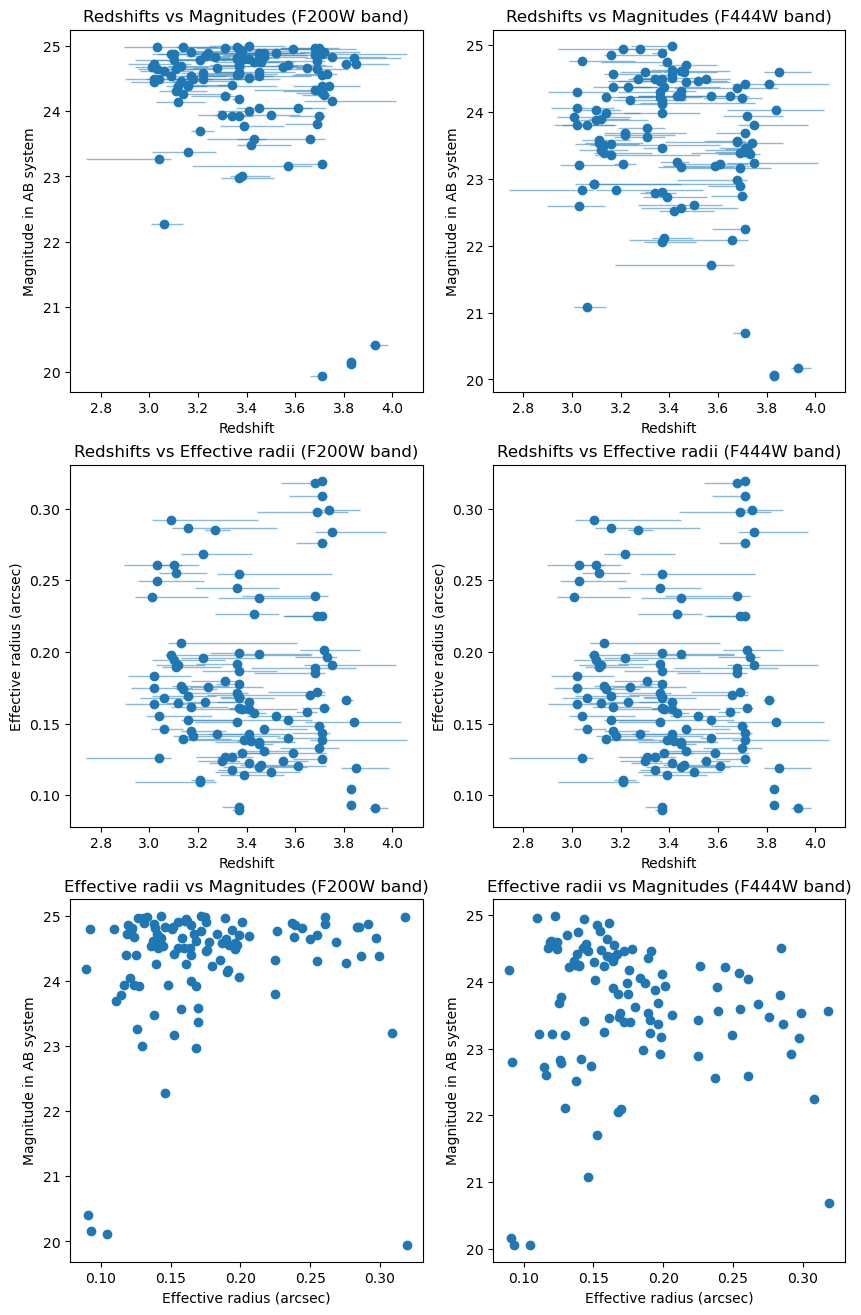

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))

#scatter plot on z vs mag (F200W):
plot=axs[0][0].scatter(x=table_final['z'],y=table_final['Mag_F200W'])
axs[0][0].set_xlabel('Redshift')
axs[0][0].set_ylabel('Magnitude in AB system')
axs[0][0].set_title('Redshifts vs Magnitudes (F200W band)')
axs[0][0].errorbar(x=table_final['z'],y=table_final['Mag_F200W'],xerr=[table_final['z_lower'],
    table_final['z_upper']],yerr=table_final['Mag_F200W_error'],alpha=0.5,elinewidth=1,fmt="None")

#scatter plot on z vs mag (F444W):
plot=axs[0][1].scatter(x=table_final['z'],y=table_final['Mag_F444W'])
axs[0][1].set_xlabel('Redshift')
axs[0][1].set_ylabel('Magnitude in AB system')
axs[0][1].set_title('Redshifts vs Magnitudes (F444W band)')
axs[0][1].errorbar(x=table_final['z'],y=table_final['Mag_F444W'],xerr=[table_final['z_lower'],
    table_final['z_upper']],yerr=table_final['Mag_F444W_error'],alpha=0.5,elinewidth=1,fmt="None")

#scatter plot on z vs Re (F200W):
plot=axs[1][0].scatter(x=table_final['z'],y=table_final['Re_F200W'])
axs[1][0].set_xlabel('Redshift')
axs[1][0].set_ylabel('Effective radius (arcsec)')
axs[1][0].set_title('Redshifts vs Effective radii (F200W band)')
axs[1][0].errorbar(x=table_final['z'],y=table_final['Re_F200W'],xerr=[table_final['z_lower'],
    table_final['z_upper']],alpha=0.5,elinewidth=1,fmt="None")

#scatter plot on z vs Re (F444W):
plot=axs[1][1].scatter(x=table_final['z'],y=table_final['Re_F444W'])
axs[1][1].set_xlabel('Redshift')
axs[1][1].set_ylabel('Effective radius (arcsec)')
axs[1][1].set_title('Redshifts vs Effective radii (F444W band)')
axs[1][1].errorbar(x=table_final['z'],y=table_final['Re_F444W'],xerr=[table_final['z_lower'],
    table_final['z_upper']],alpha=0.5,elinewidth=1,fmt="None")

#scatter plot on Re vs mag (F200W):
plot=axs[2][0].scatter(x=table_final['Re_F200W'],y=table_final['Mag_F200W'])
axs[2][0].set_xlabel('Effective radius (arcsec)')
axs[2][0].set_ylabel('Magnitude in AB system')
axs[2][0].set_title('Effective radii vs Magnitudes (F200W band)')
axs[2][0].errorbar(x=table_final['Re_F200W'],y=table_final['Mag_F200W'],yerr=table_final['Mag_F200W_error'],
    alpha=0.5,elinewidth=1,fmt="None")

#scatter plot on z vs mag (F444W):
plot=axs[2][1].scatter(x=table_final['Re_F444W'],y=table_final['Mag_F444W'])
axs[2][1].set_xlabel('Effective radius (arcsec)')
axs[2][1].set_ylabel('Magnitude in AB system')
axs[2][1].set_title('Effective radii vs Magnitudes (F444W band)')
axs[2][1].errorbar(x=table_final['Re_F444W'],y=table_final['Mag_F444W'],yerr=table_final['Mag_F444W_error'],
    alpha=0.5,elinewidth=1,fmt="None")

plt.savefig(res_dir+f"comparision_z_mag_re_z-{z_in}-{z_fin}.pdf")
plt.show()

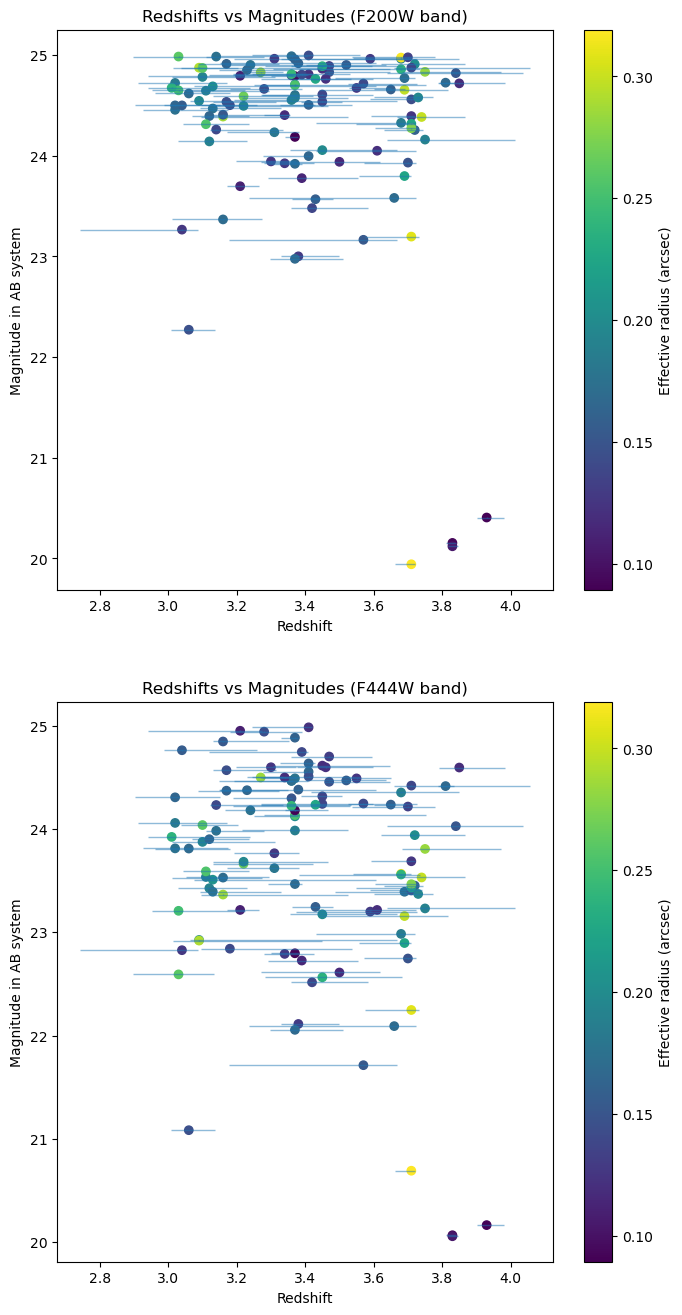

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 16))

#scatter plot on z vs mag vs Re (F200W):
plot=axs[0].scatter(x=table_final['z'],y=table_final['Mag_F200W'],c=table_final['Re_F200W'].value,
                    cmap='viridis')
axs[0].set_xlabel('Redshift')
axs[0].set_ylabel('Magnitude in AB system')
axs[0].set_title('Redshifts vs Magnitudes (F200W band)')
axs[0].errorbar(x=table_final['z'],y=table_final['Mag_F200W'],xerr=[table_final['z_lower'],
        table_final['z_upper']],yerr=table_final['Mag_F200W_error'],alpha=0.5,elinewidth=1,fmt="None")
fig.colorbar(plot,label="Effective radius (arcsec)")

#scatter plot on z vs mag vs Re (F444W):
plot=axs[1].scatter(x=table_final['z'],y=table_final['Mag_F444W'],c=table_final['Re_F444W'].value,
                    cmap='viridis')
axs[1].set_xlabel('Redshift')
axs[1].set_ylabel('Magnitude in AB system')
axs[1].set_title('Redshifts vs Magnitudes (F444W band)')
axs[1].errorbar(x=table_final['z'],y=table_final['Mag_F444W'],xerr=[table_final['z_lower'],
        table_final['z_upper']],yerr=table_final['Mag_F444W_error'],alpha=0.5,elinewidth=1,fmt="None")
fig.colorbar(plot,label="Effective radius (arcsec)")

plt.savefig(res_dir+f"comparision_z_mag_re_colorbar_z-{z_in}-{z_fin}.pdf")
plt.show()

In [12]:
time_end = datetime.now()
print(f"Initial time...: {time_ini}")
print(f"Final time.....: {time_end}")
print(f"Excecution time: {time_end-time_ini}")

Initial time...: 2023-12-18 19:25:51.310278
Final time.....: 2023-12-18 19:27:19.742975
Excecution time: 0:01:28.432697
